In [1]:
import glob

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from xclim.indices.generic import select_resample_op
from scipy.stats import genextreme as gev

In [33]:
place_latlons = {
    'Kinglake, VIC': [-37.51, 145.31],
    'Cudlee Creek, SA': [-34.85767468906389, 138.83363778607745],
    'Lindon, SA': [-28.948116761625712, 140.0976947194418],
    'Kalgoorlie, WA': [-30.752416618872665, 121.46907701090213],
}

## Australia-wide analysis

In [44]:
def plot_aus(da, selection, title, outfile, cmap=None, levels=None, extend=None, clabel=None, plot_places=False):
    """Plot Australia
    
    Args:
      da (xarray DataArray)
      selection (dict)
    
    """
    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    da.sel(selection).plot.contourf(
        ax=ax,
        levels=levels,
        extend=extend,
        transform=ccrs.PlateCarree(),
        cbar_kwargs={'label': clabel},
        cmap=cmap,
    )
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    plt.title(title)
    
    if plot_places:
        for name, location in place_latlons.items():
            lat, lon = location
            ax.plot(lon, lat, 'yo', zorder=5, transform=ccrs.PlateCarree())
    
    plt.savefig(
        outfile,
        bbox_inches='tight',
        dpi=300,
        facecolor='white',
    )

In [3]:
ds_ffdi_ari = xr.open_dataset('/g/data/wp00/users/dbi599/test_space/ffdi_test2.nc')

In [4]:
ds_ffdi_ari

<xarray.Dataset>
Dimensions:        (lon: 886, lat: 691, return_period: 1)
Coordinates:
  * lon            (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.2 156.2
  * lat            (lat) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * return_period  (return_period) float64 20.0
Data variables:
    FFDI           (return_period, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    description:  FFDI calculations. A.Dowdy, M.Thatcher, S.Osbrough
    history:      Fri Aug 19 10:12:31 2022: /g/data/wp00/users/dbi599/minicon...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [5]:
ds_ffdi_ari_params = xr.open_dataset('/g/data/wp00/users/dbi599/test_space/param_test.nc')

In [6]:
ds_ffdi_ari_params

<xarray.Dataset>
Dimensions:  (lon: 886, lat: 691, dparams: 3)
Coordinates:
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * dparams  (dparams) object 'c' 'loc' 'scale'
Data variables:
    FFDI     (dparams, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    description:  FFDI calculations. A.Dowdy, M.Thatcher, S.Osbrough
    history:      Sat Aug 20 12:05:16 2022: /g/data/wp00/users/dbi599/minicon...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

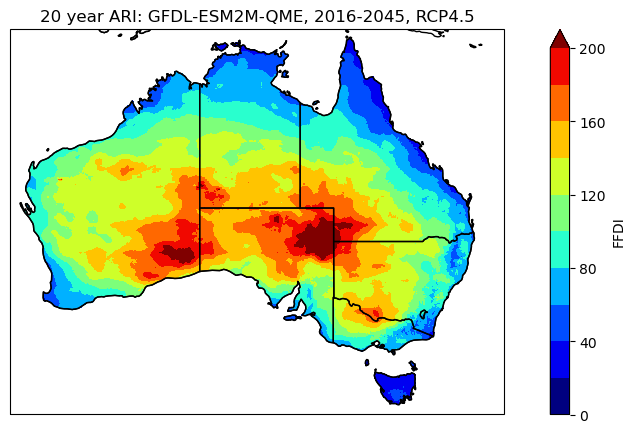

In [42]:
plot_aus(
    ds_ffdi_ari['FFDI'],
    {'return_period': 20},
    '20 year ARI: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_ARI_20yr_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    cmap='jet',
    levels=np.arange(0, 201, 20),
    extend='max',
    clabel='FFDI',
    plot_places=False,
)

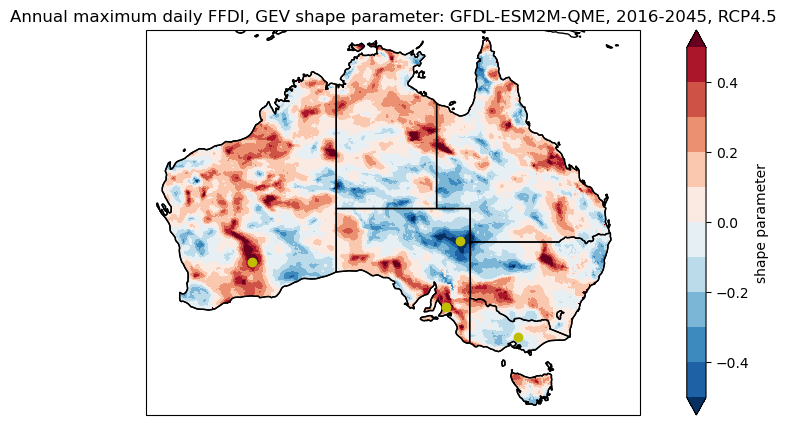

In [45]:
plot_aus(
    ds_ffdi_ari_params['FFDI'],
    {'dparams': 'c'},
    'Annual maximum daily FFDI, GEV shape parameter: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_annual-daily-max_GEV-shape_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    levels=np.arange(-0.5, 0.51, 0.1),
    extend='both',
    clabel='shape parameter',
    plot_places=True,
)

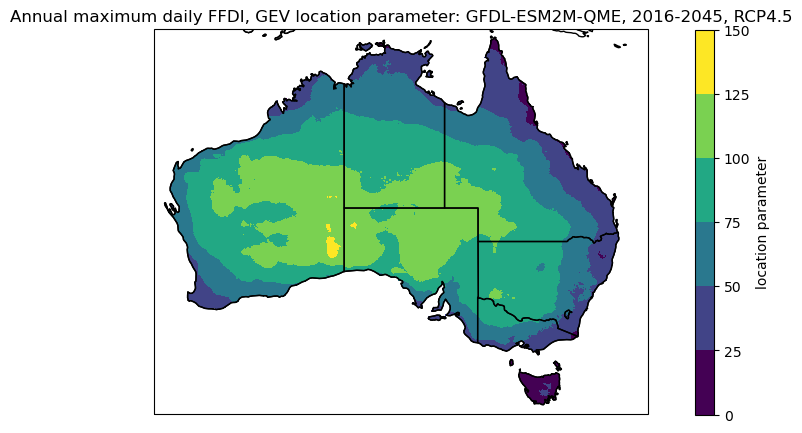

In [9]:
plot_aus(
    ds_ffdi_ari_params['FFDI'],
    {'dparams': 'loc'},
    'Annual maximum daily FFDI, GEV location parameter: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_annual-daily-max_GEV-location_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    clabel='location parameter',
)

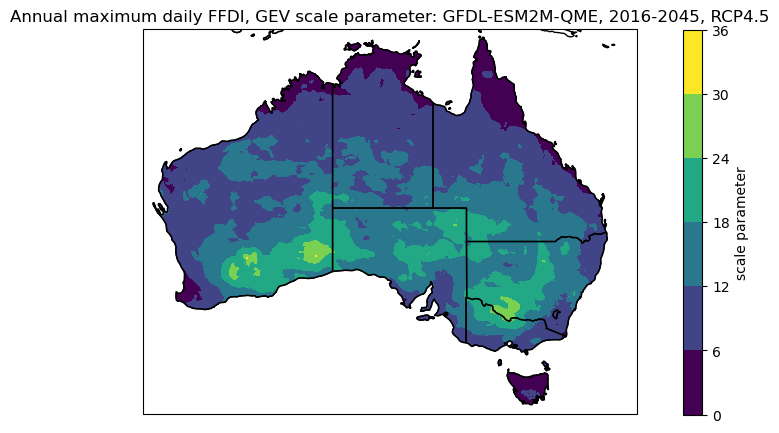

In [10]:
plot_aus(
    ds_ffdi_ari_params['FFDI'],
    {'dparams': 'scale'},
    'Annual maximum daily FFDI, GEV scale parameter: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_annual-daily-max_GEV-scale_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    clabel='scale parameter',
)

## Point analysis

In [11]:
ffdi_files = glob.glob('/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.????.nc')
ffdi_files.sort()
ffdi_files

['/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2016.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2017.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2018.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2019.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2020.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2021.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2022.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2023.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2024.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2025.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2026.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2027.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2028.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2029.nc',
 '/g/data/wp00/QQSCA

In [12]:
ds_ffdi = xr.open_mfdataset(ffdi_files)

In [13]:
ds_ffdi

<xarray.Dataset>
Dimensions:  (time: 10950, lon: 886, lat: 691)
Coordinates:
  * time     (time) object 2016-01-01 00:00:00 ... 2045-12-31 00:00:00
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
Data variables:
    FFDI     (time, lat, lon) float32 dask.array<chunksize=(365, 691, 886), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    description:  FFDI calculations. A.Dowdy, M.Thatcher, S.Osbrough
    history:      Tue Aug 16 14:09:34 2022: cdo div /g/data4/wp00/QQSCALE/GFD...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [29]:
def plot_pdf(place_name, xrange=[0, 120]):
    """Plot the PDF and GEV for a given grid point."""    

    lat, lon = place_latlons[place_name]
    ffdi_point = ds_ffdi['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    ffdi_point_sub = select_resample_op(
        ffdi_point,
        op='max',
        freq='Y',
    )
    ari_point = ds_ffdi_ari['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    params_point = ds_ffdi_ari_params['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    gev_shape, gev_loc, gev_scale = params_point.values

    fig, ax = plt.subplots(figsize=[6, 4])
    gev_xvals = np.arange(xrange[0], xrange[1])
    ffdi_point_sub.plot.hist(bins=40, density=True, color='tab:green', alpha=0.5)
    gev_pdf = gev.pdf(gev_xvals, gev_shape, gev_loc, gev_scale)
    print(f'Shape parameter: {gev_shape:.2f}')
    print(f'Location parameter: {gev_loc:.2f}')
    print(f'Scale parameter: {gev_scale:.2f}')
    plt.axvline(ari_point.values[0], color='0.5', linestyle=':')
    plt.plot(gev_xvals, gev_pdf, color='tab:green', linewidth=4.0)
    plt.xlabel('FFDI')
    plt.ylabel('probability')
    plt.title(place_name)
    plt.show()

Shape parameter: -0.10
Location parameter: 44.26
Scale parameter: 11.19


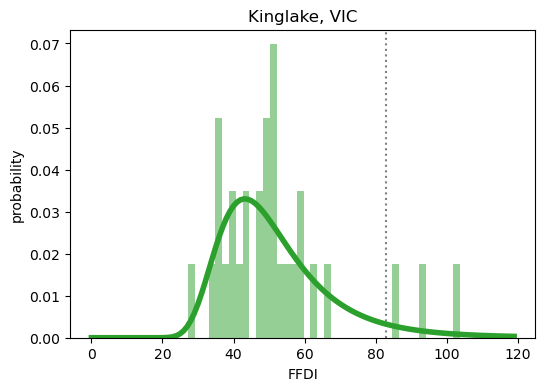

In [26]:
plot_pdf('Kinglake, VIC')

Shape parameter: 0.35
Location parameter: 55.31
Scale parameter: 11.17


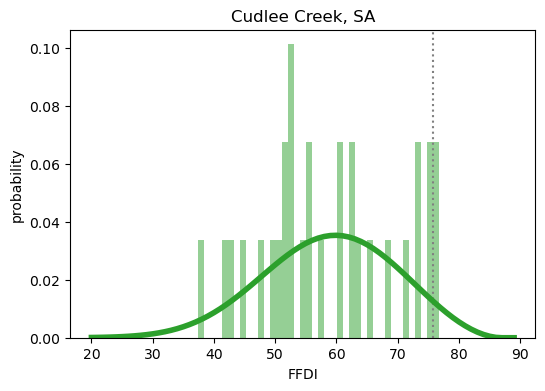

In [27]:
plot_pdf('Cudlee Creek, SA', xrange=[20, 90])

Shape parameter: -0.55
Location parameter: 99.75
Scale parameter: 19.94


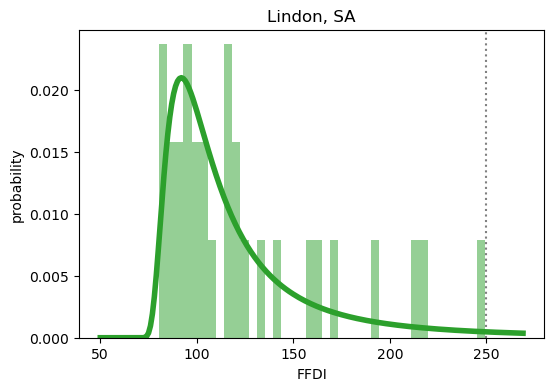

In [28]:
plot_pdf('Lindon, SA', xrange=[50, 270])

Shape parameter: 0.64
Location parameter: 106.14
Scale parameter: 25.64


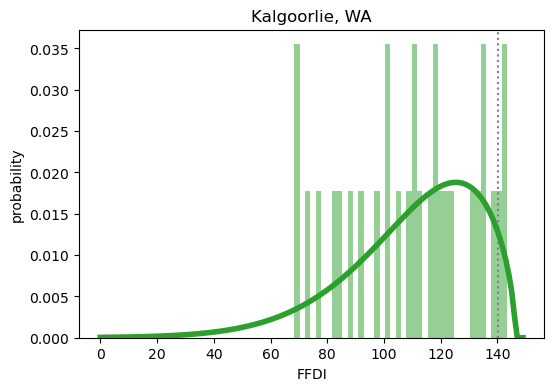

In [32]:
plot_pdf('Kalgoorlie, WA', xrange=[0, 150])